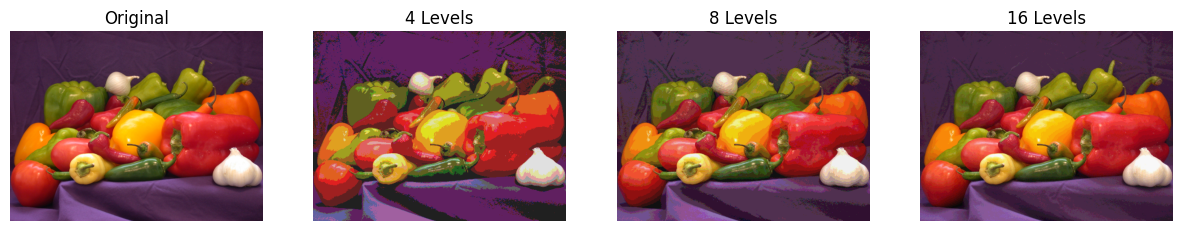

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (BGR to RGB for display)
img = cv2.imread('/content/peppers.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Function for uniform quantization
def uniform_quantization(image, levels):
    # levels: number of quantization levels per channel (e.g., 4, 8, 16)
    factor = 256 // levels
    quantized = (image // factor) * factor + factor // 2
    return quantized.astype(np.uint8)

# Apply quantization with different levels
q4 = uniform_quantization(img, 4)   # 4 levels per channel
q8 = uniform_quantization(img, 8)   # 8 levels per channel
q16 = uniform_quantization(img, 16) # 16 levels per channel

# Show results
fig, axs = plt.subplots(1, 4, figsize=(15,5))
axs[0].imshow(img); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(q4); axs[1].set_title("4 Levels"); axs[1].axis("off")
axs[2].imshow(q8); axs[2].set_title("8 Levels"); axs[2].axis("off")
axs[3].imshow(q16); axs[3].set_title("16 Levels"); axs[3].axis("off")
plt.show()



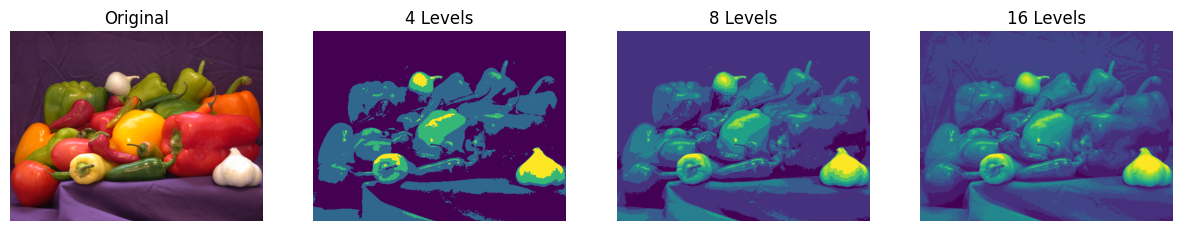

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Function for uniform quantization
def uniform_quantization(image, levels):
    # levels: number of quantization levels per channel (e.g., 4, 8, 16)
    factor = 256 // levels
    quantized = (image // factor) * factor + factor // 2
    return quantized.astype(np.uint8)

# Apply quantization with different levels
q4 = uniform_quantization(img_gray, 4)   # 4 levels per channel
q8 = uniform_quantization(img_gray, 8)   # 8 levels per channel
q16 = uniform_quantization(img_gray, 16) # 16 levels per channel

# Show results
fig, axs = plt.subplots(1, 4, figsize=(15,5))
axs[0].imshow(img); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(q4); axs[1].set_title("4 Levels"); axs[1].axis("off")
axs[2].imshow(q8); axs[2].set_title("8 Levels"); axs[2].axis("off")
axs[3].imshow(q16); axs[3].set_title("16 Levels"); axs[3].axis("off")
plt.show()

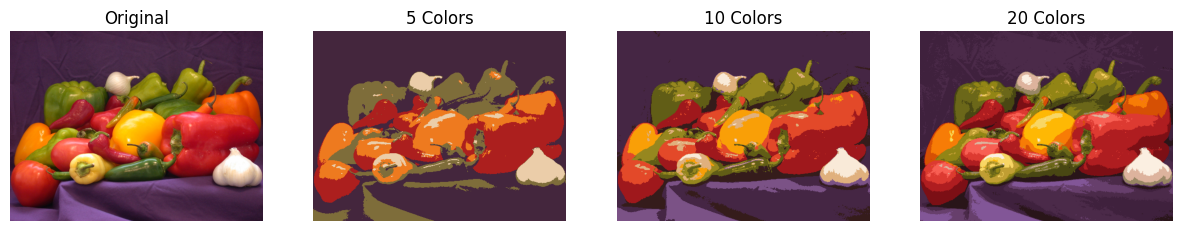

In [3]:
from sklearn.cluster import KMeans

def kmeans_quantization(image, k):
    # Reshape image to (num_pixels, 3)
    pixels = image.reshape(-1, 3)

    # Apply K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)

    # Replace pixel values with cluster centers
    new_colors = kmeans.cluster_centers_.astype(np.uint8)
    quantized = new_colors[labels].reshape(image.shape)

    return quantized

# Apply K-means with different numbers of colors
q5 = kmeans_quantization(img, 5)
q10 = kmeans_quantization(img, 10)
q20 = kmeans_quantization(img, 20)

# Show results
fig, axs = plt.subplots(1, 4, figsize=(15,5))
axs[0].imshow(img); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(q5); axs[1].set_title("5 Colors"); axs[1].axis("off")
axs[2].imshow(q10); axs[2].set_title("10 Colors"); axs[2].axis("off")
axs[3].imshow(q20); axs[3].set_title("20 Colors"); axs[3].axis("off")
plt.show()
